### IMPORTS

In [1]:
from Inference import BBVI 

In [2]:
import torch
import matplotlib.pyplot as plt
import _pickle as pickle

### EXAMPLE

In [3]:
# Find what device to work with
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [4]:
# load data and make it in proper shape
data = torch.load('C:\\Users\\cortax\\Documents\\BayesianNN\\data\\foong_data.pt')
x_data = data[0].to(device)
y_data = data[1].to(device)
y_data = y_data.unsqueeze(-1)

In [5]:
# Creating and initializing the BBVI-NeuralNet. This object if a distribution over Neural Networks, 
#it has parameters, it can be sampled, we can measure the log probabilities, etc.
Net = BBVI.VariationalNetwork(input_size=1, output_size=1, layer_width=15, nb_layers=3, device=device)

In [6]:
# Make the distribution very sharp to act like a point estimate
Net.make_deterministic_rhos()
Net.requires_grad_rhos(False)

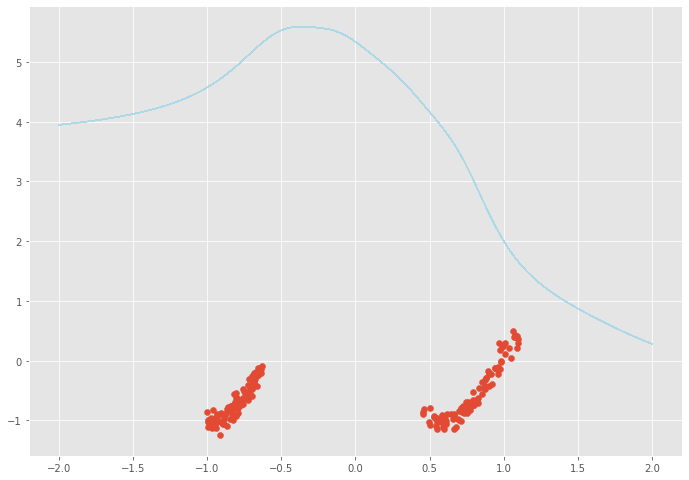

In [7]:
# Some samples of the distribution, showing a single function.
x_test = torch.linspace(-2.0, 2.0).unsqueeze(1).to(device)
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.scatter(x_data.cpu(), y_data.cpu())
for _ in range(100):
    Net.sample_parameters()
    y_test = Net.forward(x_test)
    plt.plot(x_test.detach().cpu().numpy(), y_test.squeeze(0).detach().cpu().numpy(), alpha=0.05, linewidth=1, color='lightblue') 

In [ ]:
# Optimizing the Neural Network to get a Maximum A Posteriori (MAP) estimate
optimizer = torch.optim.Adam
optimizer_params = {'lr': 0.01}
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau
scheduler_params = {'patience': 3, 'factor': 0.5}

voptimizer = BBVI.VariationalOptimizer(model=Net, sigma_noise=0.1, optimizer=optimizer, optimizer_params=optimizer_params, scheduler=scheduler, scheduler_params=scheduler_params, min_lr=0.00001)
Net = voptimizer.run((x_data,y_data), n_epoch=1000, n_iter=100, n_ELBO_samples=1, plot=True)

In [ ]:
# Plotting the resulting MAP estimate of the function
x_test = torch.linspace(-2.0, 2.0).unsqueeze(1).to(device)
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.scatter(x_data.cpu(), y_data.cpu())
for _ in range(100):
    Net.sample_parameters()
    y_test = Net.forward(x_test)
    plt.plot(x_test.detach().cpu().numpy(), y_test.squeeze(0).detach().cpu().numpy(), alpha=0.05, linewidth=1, color='lightblue') 

In [ ]:
# Unlocking the uncertainty of the parameters of the Neural Net and locking the mean of the distribution. This is no longer a point, but a distribution over Networks.
Net.requires_grad_rhos(True)
Net.requires_grad_mus(False)

In [ ]:
# Optimizing the Neural Network to get a Maximum A Posteriori (MAP) estimate
optimizer = torch.optim.Adam
optimizer_params = {'lr': 0.01}
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau
scheduler_params = {'patience': 3, 'factor': 0.5}

voptimizer = BBVI.VariationalOptimizer(model=Net, sigma_noise=0.1, optimizer=optimizer, optimizer_params=optimizer_params, scheduler=scheduler, scheduler_params=scheduler_params, min_lr=0.00001)
Net = voptimizer.run((x_data,y_data), n_epoch=1000, n_iter=100, n_ELBO_samples=100, plot=True)

In [ ]:
# Plotting the resulting distribution over function from the variational distribution over parameters
x_test = torch.linspace(-2.0, 2.0).unsqueeze(1).to(device)
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.scatter(x_data.cpu(), y_data.cpu())
for _ in range(1000):
    Net.sample_parameters()
    y_test = Net.forward(x_test)
    plt.plot(x_test.detach().cpu().numpy(), y_test.squeeze(0).detach().cpu().numpy(), alpha=0.05, linewidth=1, color='lightblue') 